In [2]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
lena = cv2.imread('baboon.jpg', cv2.IMREAD_GRAYSCALE)  # Read grayscale
print(lena)


[[145  53  50 ... 107 154 181]
 [116  99  38 ... 131 154 115]
 [ 73 121  44 ...  97  87  81]
 ...
 [146 145 146 ...  94  92  77]
 [151 140 128 ...  78  79  69]
 [ 12  10  15 ...   3   6   4]]


In [4]:
keys = [np.random.permutation(256) for _ in range(5)]  # Generate 5 random permutation keys
for i, k in enumerate(keys):
    print(f"Key {i+1} (first 10 values): {k[:10]}")

encrypted_images = []
decrypted_images = []

Key 1 (first 10 values): [104  20 138 135 132  87 100 105 121 222]
Key 2 (first 10 values): [166 224 125 181 105 117  31 131 174 154]
Key 3 (first 10 values): [ 95 178 161  16 236 221 122 145  42 153]
Key 4 (first 10 values): [113   6 124 242  43 143  89 170  69  75]
Key 5 (first 10 values): [189 179  15  83 215 124 231 186 233 118]


In [5]:
for i, key in enumerate(keys):
    inverse_key = np.argsort(key)           # Inverse key for decryption
    
    encrypted = key[lena]                  # Encrypt
    encrypted_images.append(encrypted)
    
    decrypted = inverse_key[encrypted]     # Decrypt
    decrypted_images.append(decrypted)

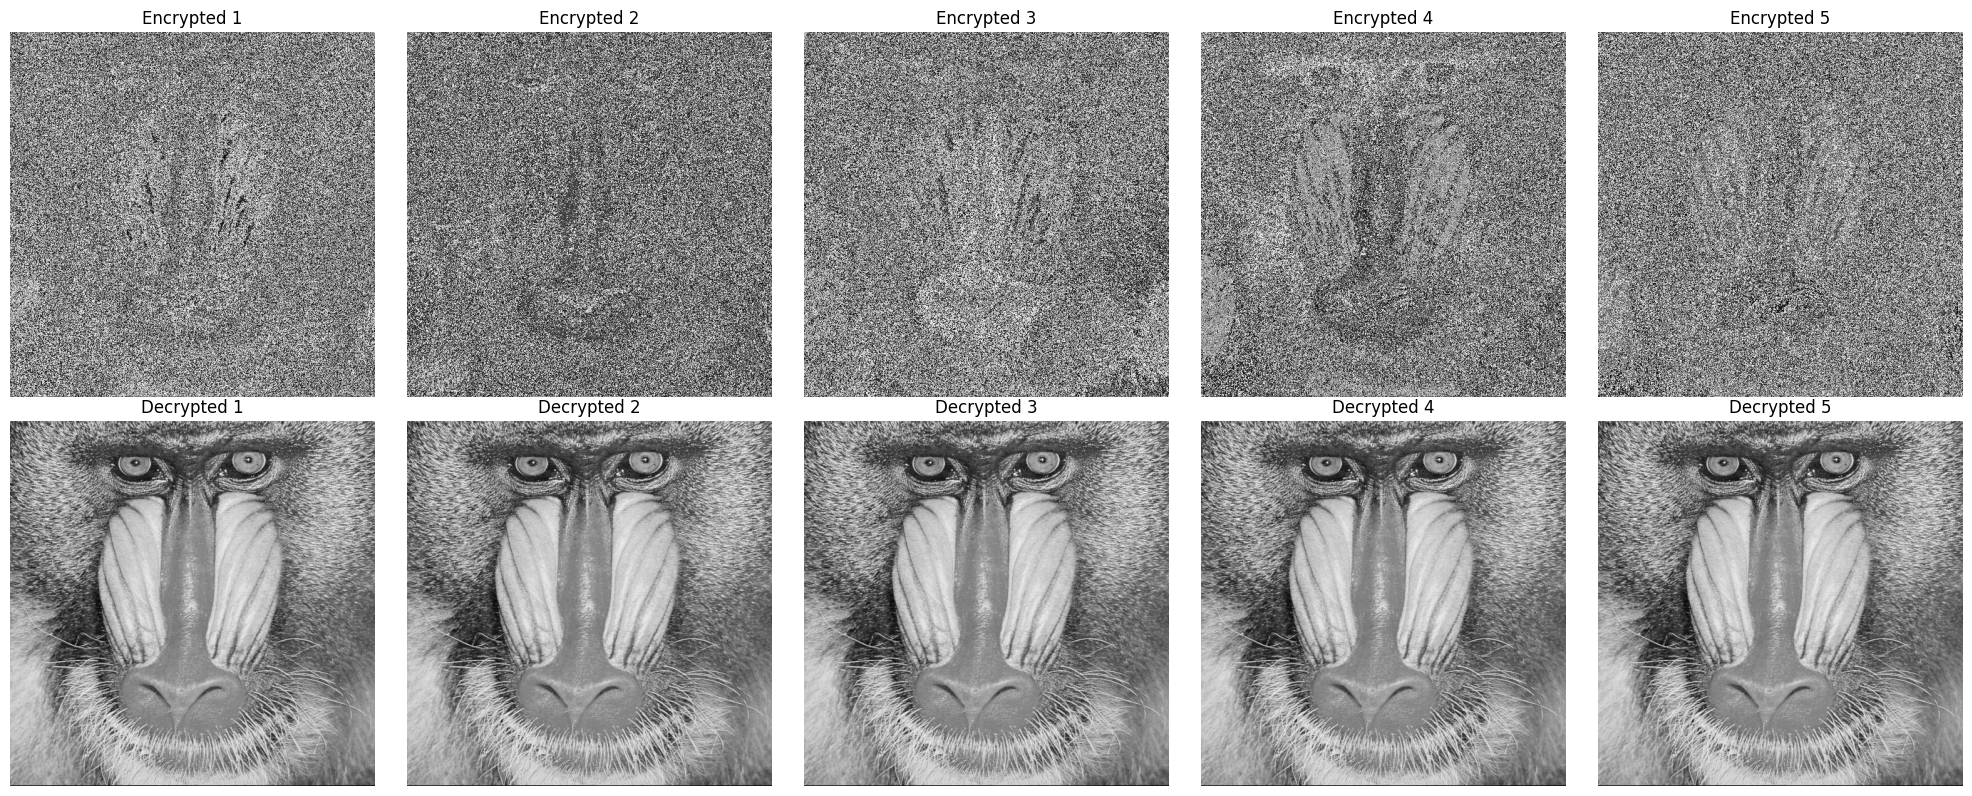

In [6]:
# Display: 2 rows, 5 columns
plt.figure(figsize=(20, 8))

# Top row: encrypted images
for i, img in enumerate(encrypted_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Encrypted {i+1}')

# Bottom row: decrypted images
for i, img in enumerate(decrypted_images):
    plt.subplot(2, 5, i+6)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Decrypted {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
# Encrypted images of both Lena and Baboon look like random noise, hiding all visual content.
# Decrypted images perfectly recover the originals.
# The Baboon image usually appears slightly more “noisy” after encryption than Lena, because Baboon has more high-frequency details and texture.

# Lena is smoother with large uniform areas, so patterns are slightly easier to notice in the encrypted image.
# Baboon has complex textures, making the encrypted result more uniformly random-looking.
# This difference comes from the image content and pixel distribution.

# It can be used for basic image privacy or obfuscation.
# Not suitable for strong security on its own, because if the key is discovered, the image can be fully decrypted.
# Best used for lightweight encryption or educational demonstrations.